# 🍅 Tomato Disease Classification using Transfer Learning

## Project Overview

This project aims to classify various tomato plant diseases using transfer learning with a pre-trained model. Transfer learning allows us to leverage an already-trained model, adapting it to our specific task of identifying tomato diseases. Early identification of diseases can help farmers take timely action to prevent crop damage and optimize yield. The model identifies diseases like bacterial spot, early blight, late blight, and other common tomato diseases.

### Key Steps:
1. **Data Loading**: Loading the dataset of tomato leaf images.
2. **Data Preprocessing**: Preprocessing images to make them suitable for model input.
3. **Transfer Learning Model**: Using a pre-trained model for tomato disease classification.
4. **Model Training**: Training the model on the labeled dataset.
5. **Evaluation**: Evaluating the model’s accuracy and performance.
6. **Results and Conclusions**: Summarizing findings and possible applications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import os
import cv2 as cv

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


## Data Loading

In [3]:
path=r"D:\DataScience\CNN\Tomato leaf\tomato\train"

## Data Preprocessing

In [4]:
dis=os.listdir(path)
dis

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

## Model Architecture

In [5]:
dis.index('Tomato___Early_blight')

1

In [6]:
Data=[]
for i in dis:# ALL FOLDERS INSIDE PARENT PATH
    A=os.path.join(path,i) #FOR JOINING PATHS
    for j in os.listdir(A):# FOR GETTING ALL CONTENT FROM FOLDER
        B=os.path.join(A,j)#JOIN
        img=cv.imread(B)#CONVERTING IMAGE TO PIXEL INTENSITY MATRIX
        C=cv.resize(img,(150,150))# RESIZING PIXEL INTENSITY MATRIX
        T=dis.index(i) #FOR GETTING TARGET VARIABLE
        Data.append([C,T]) #TO STORE

In [7]:
i=cv.imread(r"D:\DataScience\CNN\Tomato leaf\tomato\train\Tomato___Bacterial_spot\33950b17-918e-4243-bfbd-be33874b62c4___GCREC_Bact.Sp 3303.JPG")


## Model Training

In [8]:
i.shape

(256, 256, 3)

In [9]:
Data[1]

[array([[[110, 113, 128],
         [109, 112, 127],
         [106, 109, 124],
         ...,
         [ 95, 102, 117],
         [ 88,  95, 110],
         [ 91,  98, 113]],
 
        [[112, 115, 130],
         [114, 117, 132],
         [104, 107, 122],
         ...,
         [ 91,  98, 113],
         [102, 109, 124],
         [112, 119, 134]],
 
        [[ 96,  99, 114],
         [ 98, 101, 116],
         [104, 107, 122],
         ...,
         [103, 110, 125],
         [ 88,  95, 110],
         [ 96, 103, 118]],
 
        ...,
 
        [[147, 149, 160],
         [149, 152, 162],
         [147, 149, 160],
         ...,
         [145, 149, 160],
         [149, 153, 164],
         [148, 152, 163]],
 
        [[143, 145, 156],
         [145, 147, 158],
         [149, 151, 162],
         ...,
         [145, 149, 159],
         [141, 145, 156],
         [149, 153, 164]],
 
        [[146, 148, 159],
         [153, 155, 166],
         [134, 136, 148],
         ...,
         [149, 153, 164],
  

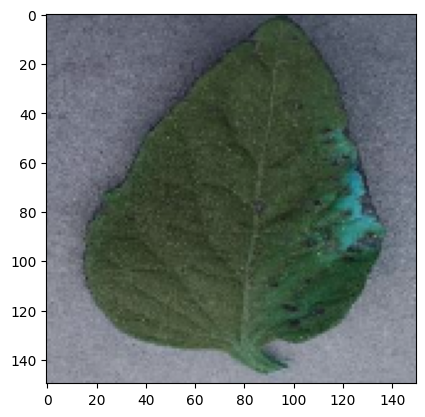

In [10]:
plt.imshow(Data[1][0])#IMAGE SHWING CODE

## Model Evaluation

In [11]:
len(Data)

10000

In [12]:
len(Data[1][0])

150

In [13]:
Data[7872][1]

7

In [14]:
import random #for shuffle
random.shuffle(Data)

In [15]:
F=[]
T=[]
for i,j in Data:#FOR SEPERATING FEATURES AND TARGETS
    F.append(i)
    T.append(j)

In [16]:
len(F)

10000

In [17]:
T

[5,
 3,
 5,
 3,
 0,
 3,
 4,
 2,
 1,
 2,
 9,
 9,
 0,
 0,
 9,
 0,
 1,
 0,
 3,
 4,
 7,
 5,
 9,
 6,
 2,
 0,
 4,
 0,
 0,
 2,
 9,
 3,
 7,
 5,
 1,
 3,
 4,
 1,
 5,
 3,
 8,
 6,
 0,
 4,
 3,
 9,
 6,
 6,
 0,
 8,
 8,
 2,
 5,
 9,
 4,
 6,
 8,
 6,
 3,
 0,
 7,
 7,
 4,
 4,
 5,
 9,
 4,
 9,
 5,
 8,
 9,
 2,
 3,
 3,
 3,
 1,
 0,
 3,
 9,
 0,
 8,
 8,
 3,
 9,
 1,
 5,
 8,
 2,
 9,
 4,
 9,
 8,
 4,
 4,
 1,
 5,
 2,
 2,
 0,
 6,
 1,
 7,
 4,
 6,
 5,
 1,
 4,
 1,
 4,
 7,
 7,
 0,
 1,
 5,
 0,
 3,
 4,
 3,
 3,
 8,
 3,
 5,
 7,
 6,
 5,
 4,
 2,
 7,
 7,
 8,
 0,
 7,
 7,
 5,
 9,
 0,
 5,
 4,
 0,
 7,
 9,
 5,
 7,
 6,
 5,
 4,
 9,
 9,
 1,
 7,
 4,
 8,
 1,
 8,
 5,
 8,
 3,
 9,
 6,
 7,
 7,
 5,
 2,
 6,
 6,
 0,
 9,
 7,
 9,
 8,
 9,
 3,
 3,
 0,
 0,
 4,
 1,
 6,
 4,
 3,
 8,
 9,
 7,
 6,
 6,
 5,
 1,
 8,
 7,
 2,
 9,
 5,
 9,
 8,
 8,
 0,
 4,
 3,
 0,
 7,
 8,
 8,
 1,
 0,
 3,
 2,
 8,
 7,
 1,
 9,
 5,
 0,
 5,
 5,
 6,
 5,
 6,
 6,
 7,
 6,
 7,
 1,
 8,
 7,
 8,
 1,
 2,
 3,
 9,
 7,
 2,
 7,
 1,
 8,
 5,
 7,
 5,
 9,
 3,
 7,
 5,
 2,
 9,
 3,
 1,
 9,
 4,
 3,
 3,
 9,


In [18]:
T1=pd.get_dummies(T).replace({True:1,False:0}) # THESE TARGETS ARE NOMINAL SO GETTING DUMMIES FOR MAINTAING THE IN BETWEEN RELATION WITHOUT AFFECTING THE MODEL
T1

C:\Users\malip\AppData\Local\Temp\ipykernel_15816\4243940820.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0}) # THESE TARGETS ARE NOMINAL SO GETTING DUMMIES FOR MAINTAING THE IN BETWEEN RELATION WITHOUT AFFECTING THE MODEL


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,0,0,0
9996,0,0,0,0,1,0,0,0,0,0
9997,0,0,0,0,0,1,0,0,0,0
9998,0,0,0,0,0,0,0,0,1,0


In [19]:
F=np.array(F)#FOR FASTER CALCULATION

In [20]:
F1=F/255 #FOR MINMAX SCALER

In [21]:
F[1]#FIRST IMAGE WITHOUT MINMAX

array([[[121, 115, 116],
        [113, 107, 108],
        [118, 111, 112],
        ...,
        [151, 141, 143],
        [154, 144, 146],
        [152, 141, 143]],

       [[115, 110, 111],
        [113, 107, 108],
        [119, 113, 113],
        ...,
        [154, 143, 145],
        [149, 138, 140],
        [155, 144, 146]],

       [[112, 106, 107],
        [113, 108, 109],
        [117, 111, 112],
        ...,
        [144, 133, 135],
        [148, 137, 139],
        [150, 139, 141]],

       ...,

       [[ 90,  86,  85],
        [ 95,  91,  90],
        [ 94,  90,  89],
        ...,
        [135, 131, 130],
        [138, 134, 133],
        [140, 136, 135]],

       [[ 90,  86,  85],
        [ 93,  89,  88],
        [ 90,  86,  85],
        ...,
        [132, 128, 127],
        [134, 130, 129],
        [136, 132, 131]],

       [[ 89,  85,  84],
        [ 89,  85,  84],
        [ 91,  87,  86],
        ...,
        [132, 128, 127],
        [135, 131, 130],
        [140, 136, 135]]

In [22]:
F1[1]#FIRST IMAGE AFTER MINMAX

array([[[0.4745098 , 0.45098039, 0.45490196],
        [0.44313725, 0.41960784, 0.42352941],
        [0.4627451 , 0.43529412, 0.43921569],
        ...,
        [0.59215686, 0.55294118, 0.56078431],
        [0.60392157, 0.56470588, 0.57254902],
        [0.59607843, 0.55294118, 0.56078431]],

       [[0.45098039, 0.43137255, 0.43529412],
        [0.44313725, 0.41960784, 0.42352941],
        [0.46666667, 0.44313725, 0.44313725],
        ...,
        [0.60392157, 0.56078431, 0.56862745],
        [0.58431373, 0.54117647, 0.54901961],
        [0.60784314, 0.56470588, 0.57254902]],

       [[0.43921569, 0.41568627, 0.41960784],
        [0.44313725, 0.42352941, 0.42745098],
        [0.45882353, 0.43529412, 0.43921569],
        ...,
        [0.56470588, 0.52156863, 0.52941176],
        [0.58039216, 0.5372549 , 0.54509804],
        [0.58823529, 0.54509804, 0.55294118]],

       ...,

       [[0.35294118, 0.3372549 , 0.33333333],
        [0.37254902, 0.35686275, 0.35294118],
        [0.36862745, 0

In [23]:
F1.shape#10000 IMAGES HAVING WIDTH OF 150 ,HEIGHT OF 150 AND 3 RGB CHANNEL

(10000, 150, 150, 3)

In [24]:
T1.shape #TARGET VARIABLE SHAPE

(10000, 10)

In [25]:
T=np.array(T)

# Transfer Learning models

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the initial layers, unfreeze last few for fine-tuning
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Define the Model with Data Augmentation and Fully Connected Layers
num_classes = 10  
model = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure this matches the number of classes
])

# Compile the Model with a Suitable Loss Function and Optimizer
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
    path, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # or 'sparse' if using integer labels
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Match train_generator's class_mode
    subset='validation'
)

# Fit the model with data generators
history = model.fit(
    train_generator,
    epochs=20,  # Adjust as needed based on performance
    validation_data=validation_generator
)


Found 8500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Epoch 1/20
266/266 [==============================] - 66s 216ms/step - loss: 1.4632 - accuracy: 0.4961 - val_loss: 0.8488 - val_accuracy: 0.7140
Epoch 2/20
266/266 [==============================] - 52s 197ms/step - loss: 0.8143 - accuracy: 0.7295 - val_loss: 0.6065 - val_accuracy: 0.8040
Epoch 3/20
266/266 [==============================] - 52s 195ms/step - loss: 0.5825 - accuracy: 0.8120 - val_loss: 0.6430 - val_accuracy: 0.7800
Epoch 4/20
266/266 [==============================] - 52s 196ms/step - loss: 0.4852 - accuracy: 0.8420 - val_loss: 0.4328 - val_accuracy: 0.8553
Epoch 5/20
266/266 [==============================] - 53s 200ms/step - loss: 0.4065 - accuracy: 0.8711 - val_loss: 0.4864 - val_accuracy: 0.8427
Epoch 6/20
266/266 [==============================] - 53s 199ms/step - loss: 0.3319 - accuracy: 0.8952 - val_loss: 0.5850 - val_accuracy: 0.8313
Epoch 7/20
266/266 [========================

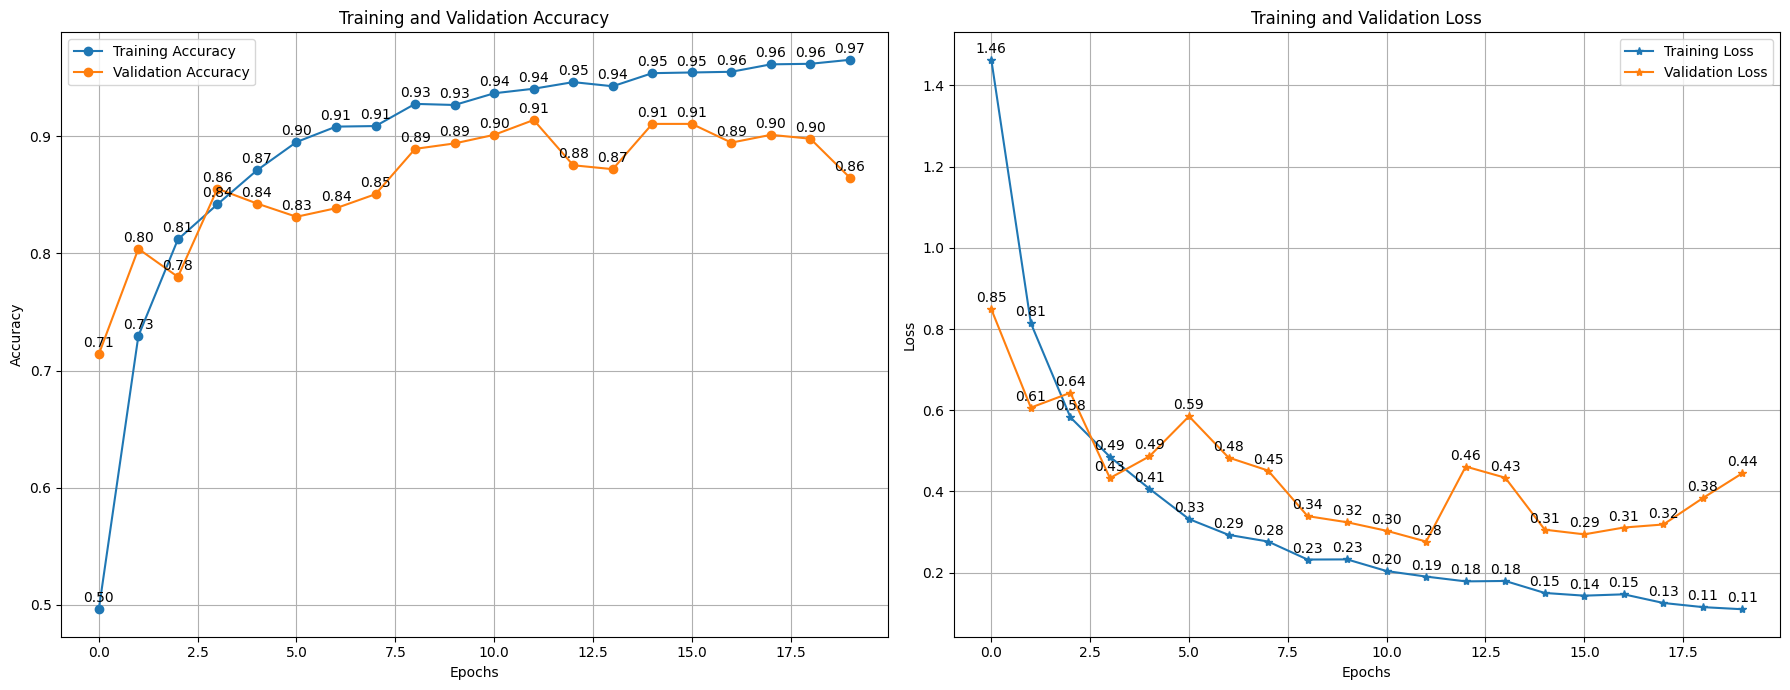

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(18, 7))

# Training and validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()

# Display values on each point
for i, (train_acc, val_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy'])):
    plt.annotate(f'{train_acc:.2f}', (i, train_acc), ha="center", xytext=(0, 5), textcoords="offset points", fontsize=10)
    plt.annotate(f'{val_acc:.2f}', (i, val_acc), ha="center", xytext=(0, 5), textcoords="offset points", fontsize=10)


# Training and validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss',marker="*")
plt.plot(history.history['val_loss'], label='Validation Loss',marker="*")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
for i, (train_acc, val_acc) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
    plt.annotate(f'{train_acc:.2f}', (i, train_acc), ha="center", xytext=(0, 5), textcoords="offset points", fontsize=10)
    plt.annotate(f'{val_acc:.2f}', (i, val_acc), ha="center", xytext=(0, 5), textcoords="offset points", fontsize=10)
# Show plots
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the validation directory
val_path =r"D:\DataScience\CNN\Tomato leaf\tomato\val" 

# Define the ImageDataGenerator for validation
val_datagen = ImageDataGenerator(rescale=1./255)  

# Create a validation generator
validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),  # Use the same target size as during training
    batch_size=32,
    class_mode='categorical'  
)

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 1000 images belonging to 10 classes.
32/32 [==============================] - 7s 213ms/step - loss: 0.4277 - accuracy: 0.8650
Validation Loss: 0.4277278780937195
Validation Accuracy: 86.50%


## Conclusion

In this project, we successfully applied transfer learning to classify various tomato diseases. Transfer learning enabled us to use a pre-trained model, making the process faster and more efficient.